In [1]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd

In [2]:
compras = pd.read_csv('./social-network-ads.csv', on_bad_lines='skip')

compras.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
compras.shape

(400, 3)

In [4]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

<Axes: ylabel='Frequency'>

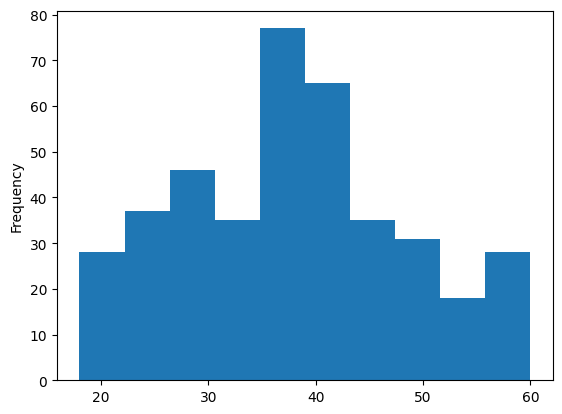

In [5]:
compras['Age'].plot.hist()

<Axes: ylabel='Frequency'>

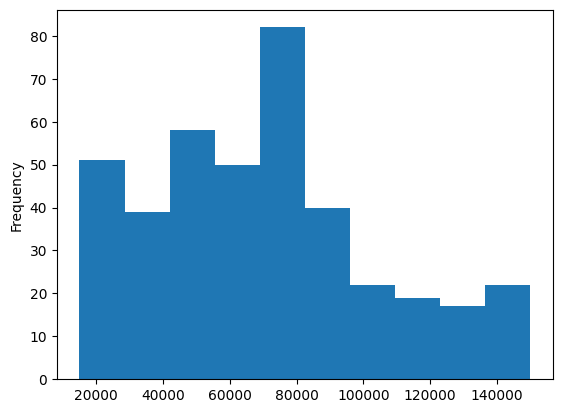

In [6]:
compras['EstimatedSalary'].plot.hist()

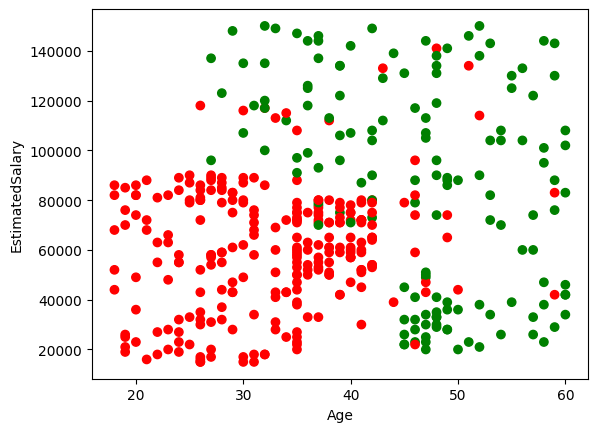

In [7]:
fig, ax = plt.subplots()

colors = {0:'red',1:'green'}
ax.scatter(compras['Age'], compras['EstimatedSalary'], c=compras['Purchased'].map(colors))
ax.set_ylabel(compras.columns.values[1])
ax.set_xlabel(compras.columns.values[0])

plt.show()

In [8]:
compras.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
compras.columns.values

array(['Age', 'EstimatedSalary', 'Purchased'], dtype=object)

In [10]:
compras.columns.values.shape

(3,)

In [11]:
atributos = compras[['Age','EstimatedSalary']]
classes = compras['Purchased']

In [12]:
np.random.seed(0)

In [13]:
compras.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(atributos, classes, test_size=0.33, random_state=42)



In [15]:
# SEM normalização dos dados

if not True:
    svm = SVC(C=0.5, kernel='linear')
    svm.fit(X_train, y_train)

    print("i have been trained")

    # Plotting decision regions
    plot_decision_regions(X_train, y_train, clf=svm, legend=2)

    # Adding axes annotations
    #plt.xlabel('sepal length [cm]')
    #plt.title('SVM on Iris')

    plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#forma correta de fazer a normalização é aprender a normailização no treino e depois aplicar essa transformação no teste
X_train = scaler.fit_transform(X_train) # 2 passos em 1

#scaler.fit(X_train) # fita o mapeamento da normalização
#X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)



In [17]:
print(X_train[:,0].min())
print(X_train[:,0].max())

print(X_train[:,1].min())
print(X_train[:,1].max())
#print(X_train.max())


-1.913112392771568
2.2011392490008372
-1.6379308934670627
2.3491739794144775


In [18]:
# AGORA com normalização dos dados

from sklearn.svm import SVC

svm = SVC(C=0.5, kernel='linear') # quanto maior C, menor a tolerância a erro
svm.fit(X_train, y_train)


SVC(C=0.5, kernel='linear')

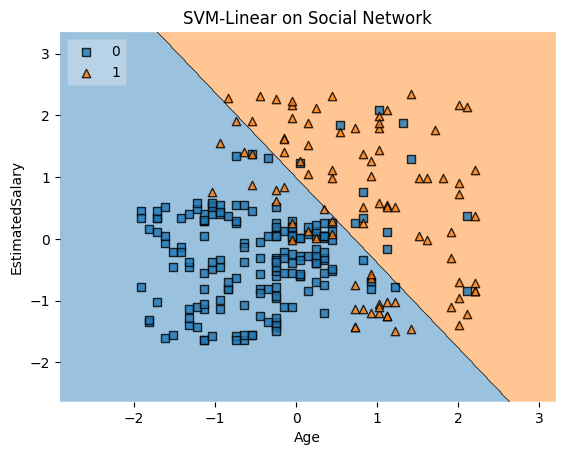

In [19]:
# Plotting decision regions
plot_decision_regions(X_train, y_train.to_numpy(), clf=svm, legend=2)

# Adding axes annotations
plt.xlabel(compras.columns.values[0])
plt.ylabel(compras.columns.values[1])

plt.title('SVM-Linear on Social Network')

plt.show()

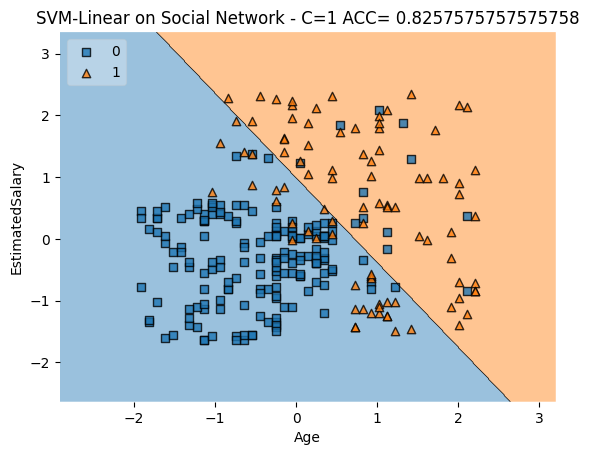

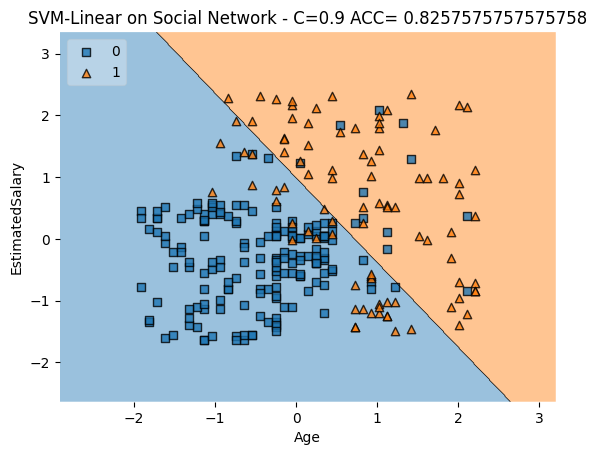

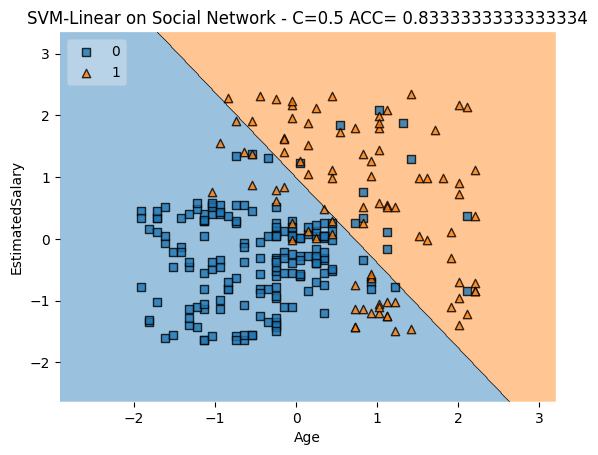

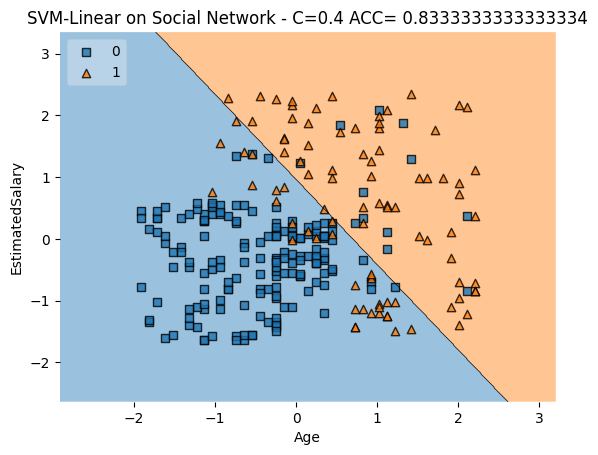

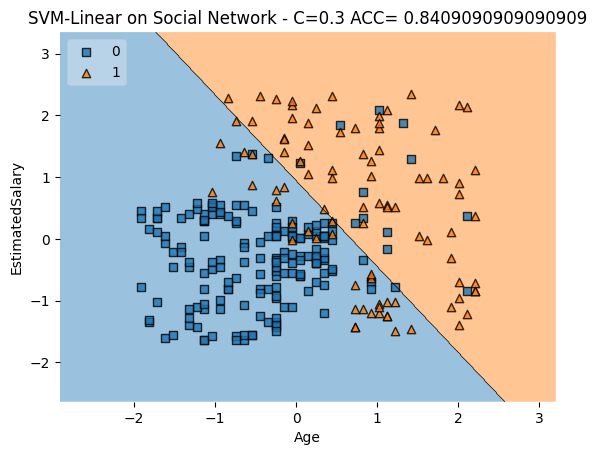

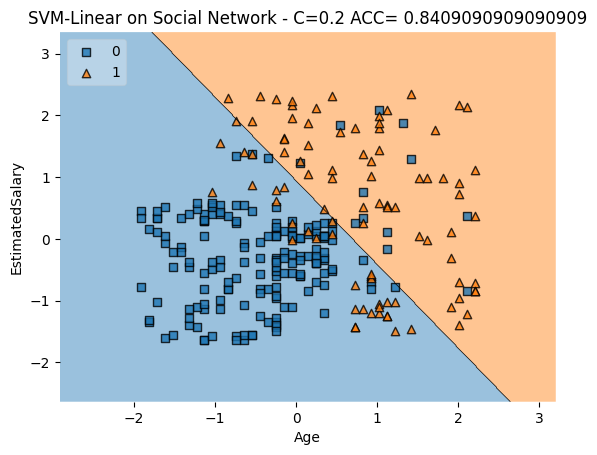

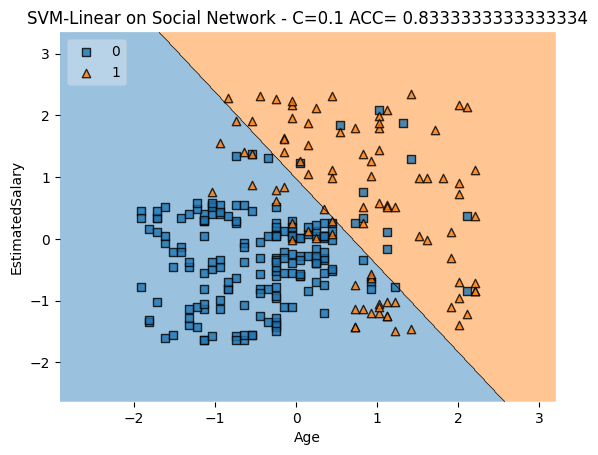

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

costs = [1,0.9,0.5,0.4,0.3,0.2,0.1]

for C in costs:
  svm = SVC(C=C,kernel='linear') # quanto maior C, menor a tolerância a erro
  svm.fit(X_train, y_train)

  # Plotting decision regions
  plot_decision_regions(X_train, y_train.to_numpy(), clf=svm, legend=2)

  # Adding axes annotations
  plt.xlabel(compras.columns.values[0])
  plt.ylabel(compras.columns.values[1])

  y_pred = svm.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)

  plt.title('SVM-Linear on Social Network - ' + 'C='+ str(C) + " ACC= " + str(accuracy))

  plt.show()



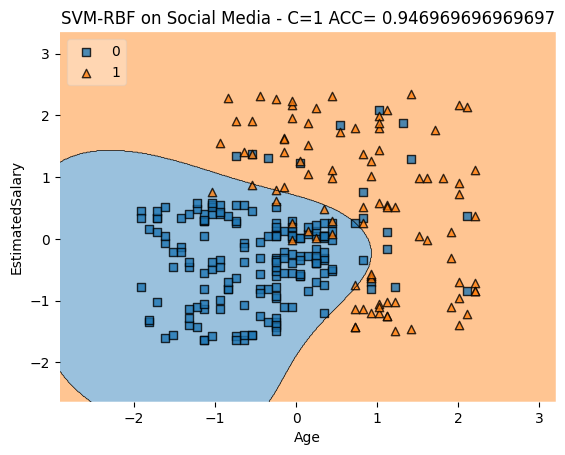

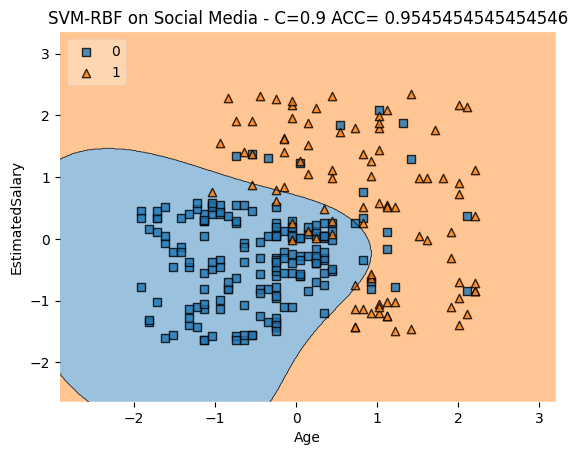

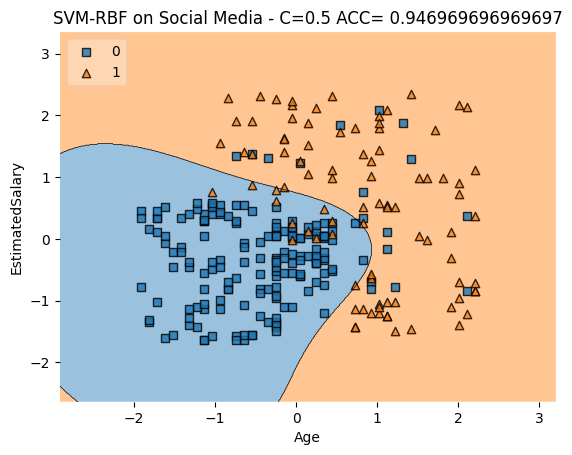

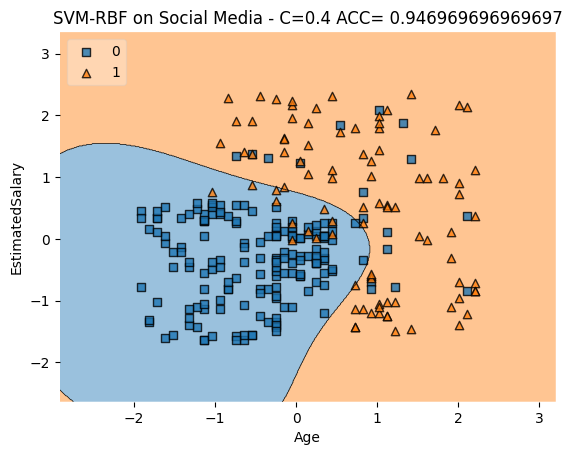

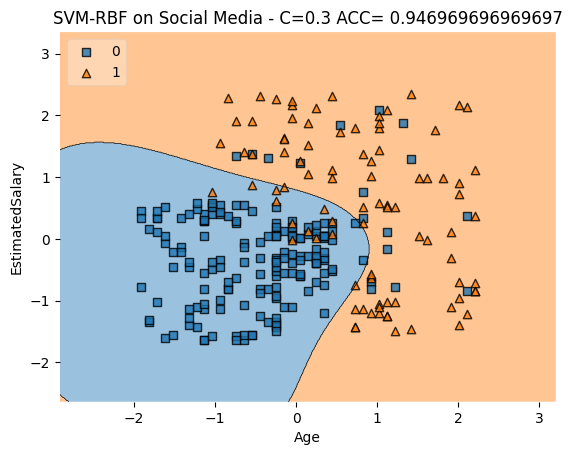

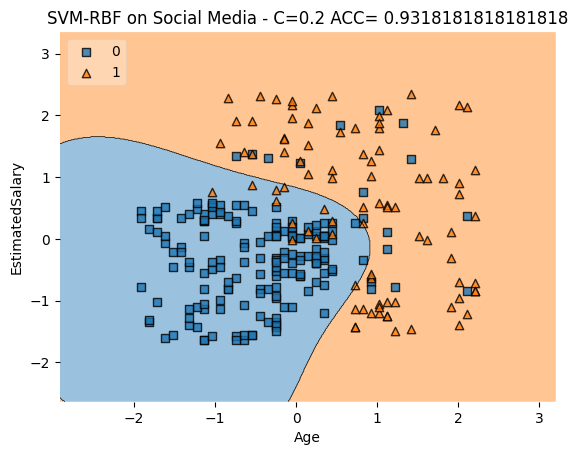

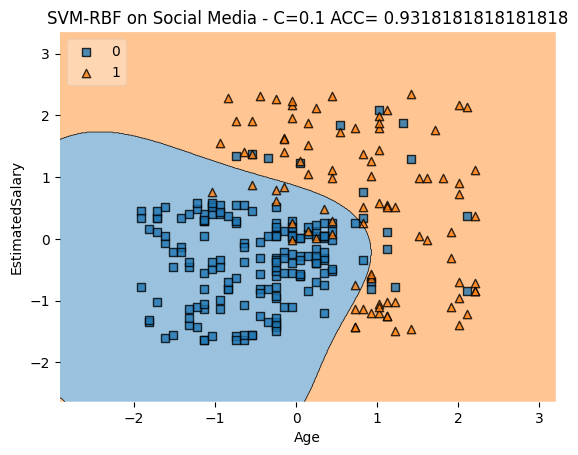

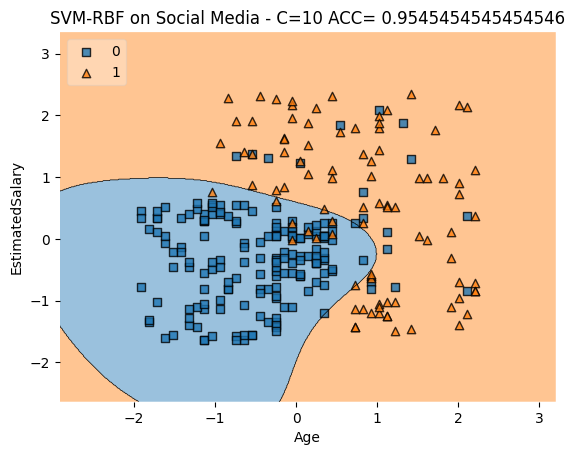

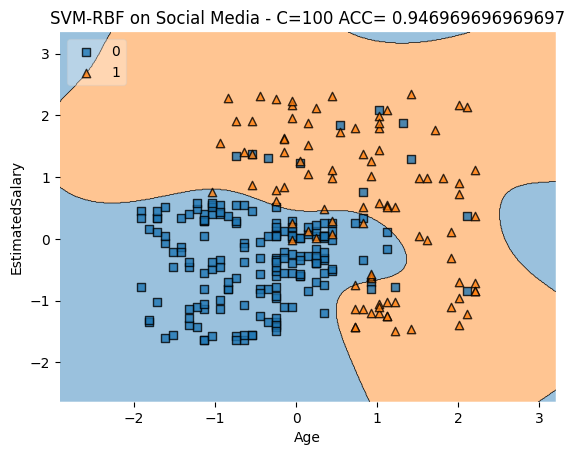

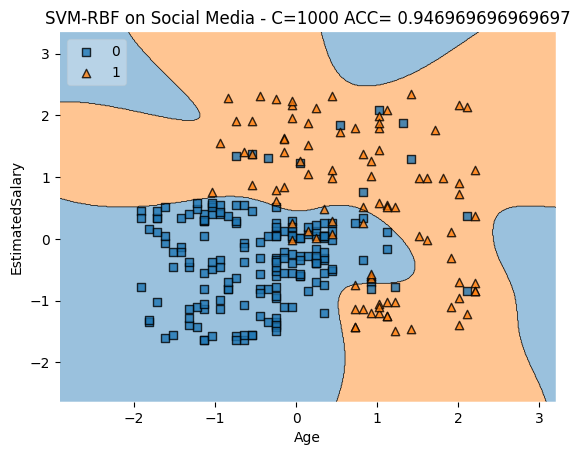

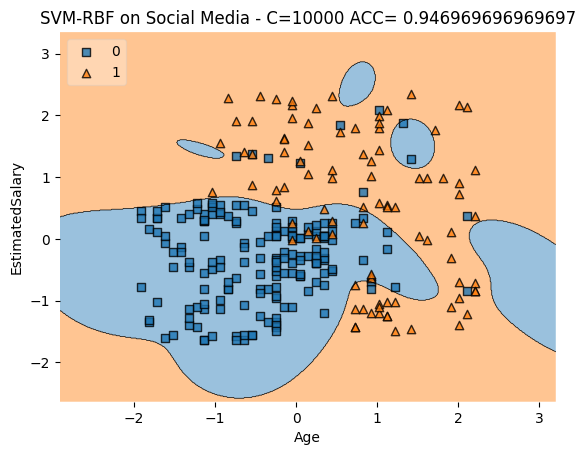

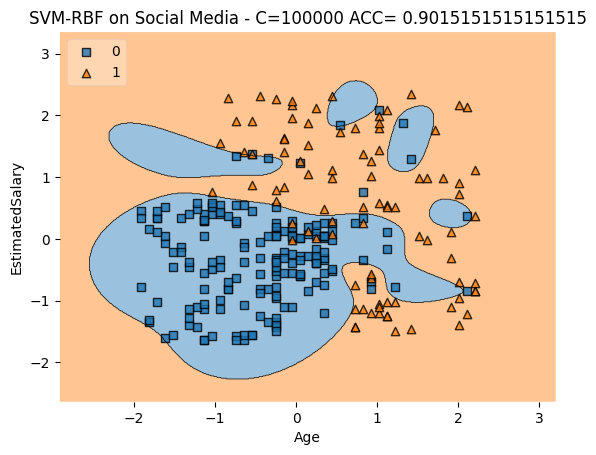

In [21]:


costs = [1,0.9,0.5,0.4,0.3,0.2,0.1,10,100,1000,10000,100000]


for C in costs:
  svm = SVC(C=C,kernel='rbf') # quanto maior C, menor a tolerância a erro
  svm.fit(X_train, y_train)

  # Plotting decision regions
  plot_decision_regions(X_train, y_train.to_numpy(), clf=svm, legend=2)

  # Adding axes annotations
  plt.xlabel(compras.columns.values[0])
  plt.ylabel(compras.columns.values[1])

  y_pred = svm.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)

  plt.title('SVM-RBF on Social Media - ' + 'C='+ str(C) + " ACC= " + str(accuracy))

  plt.show()




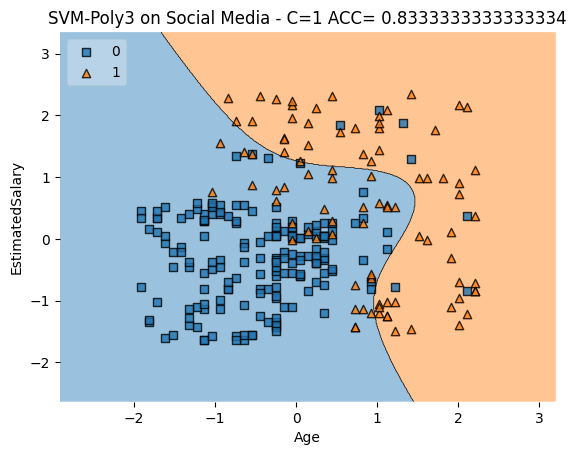

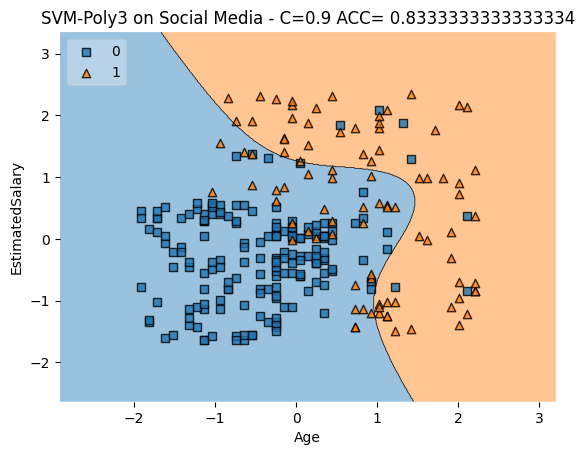

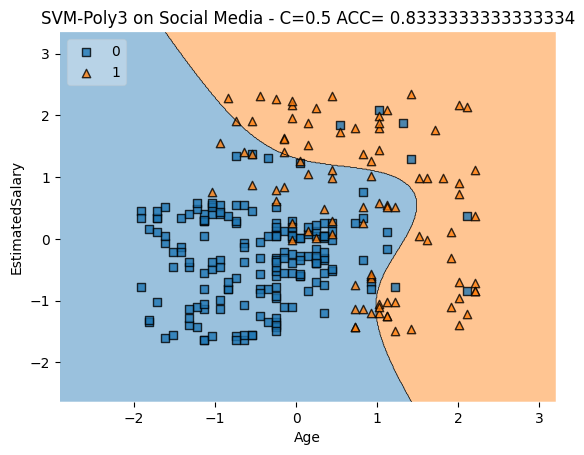

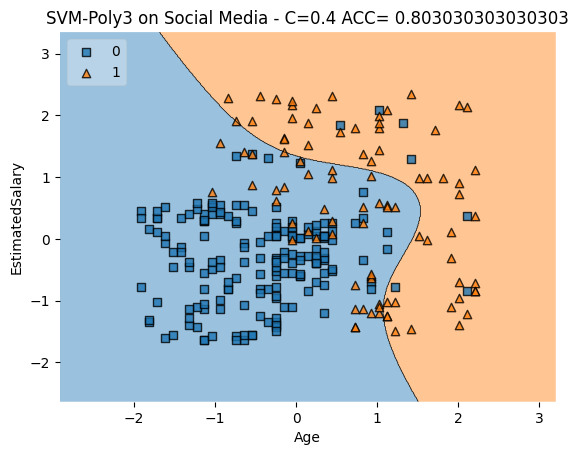

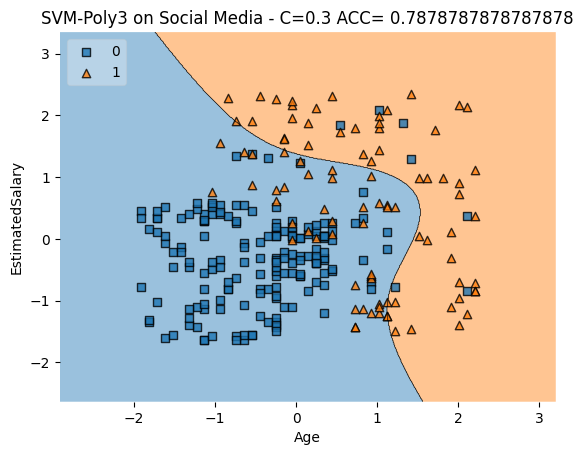

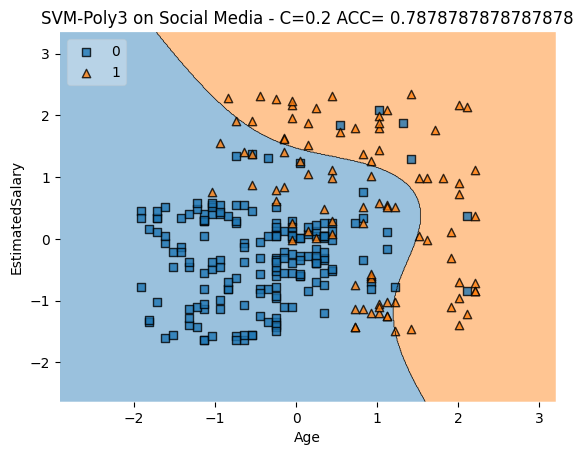

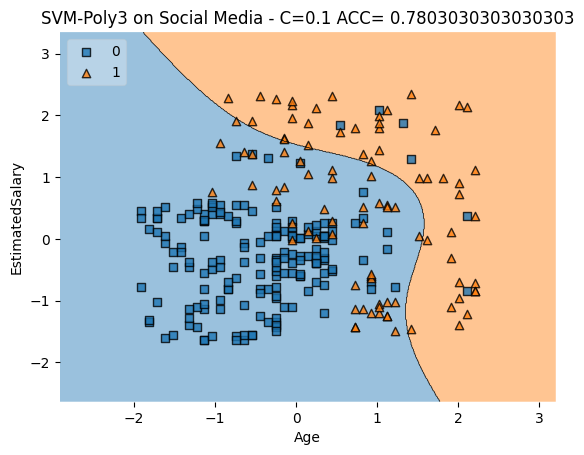

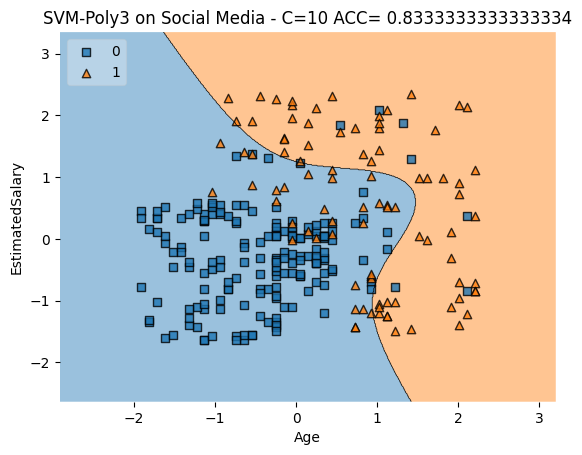

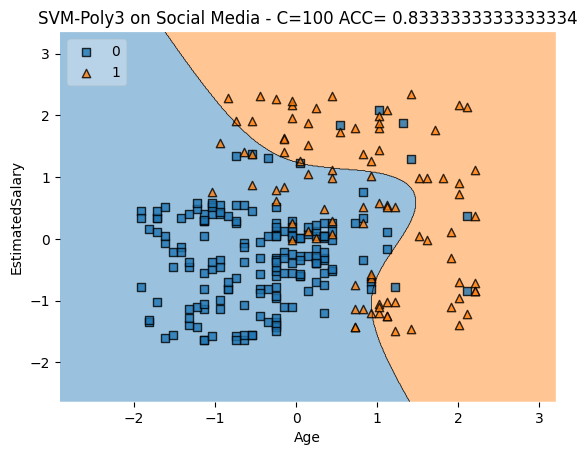

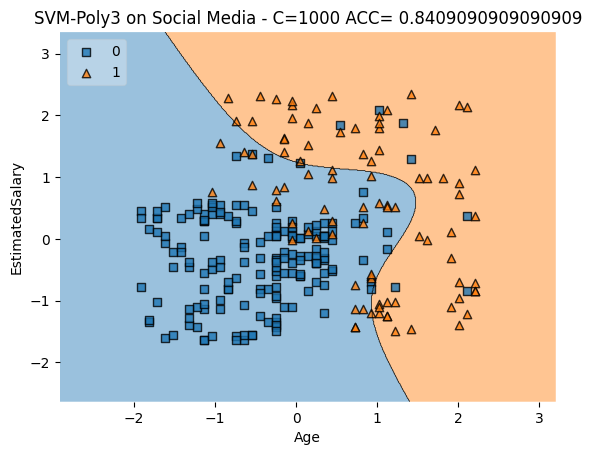

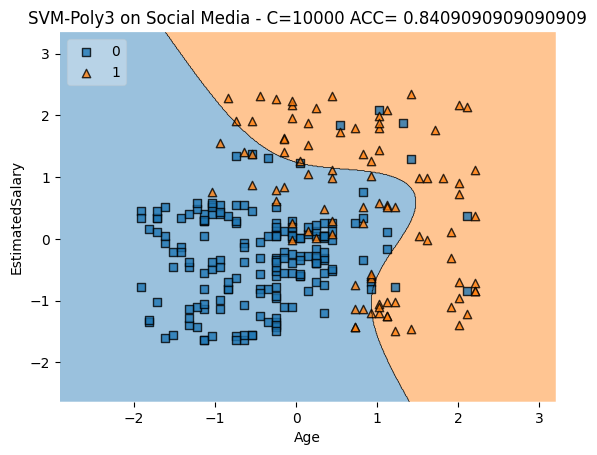

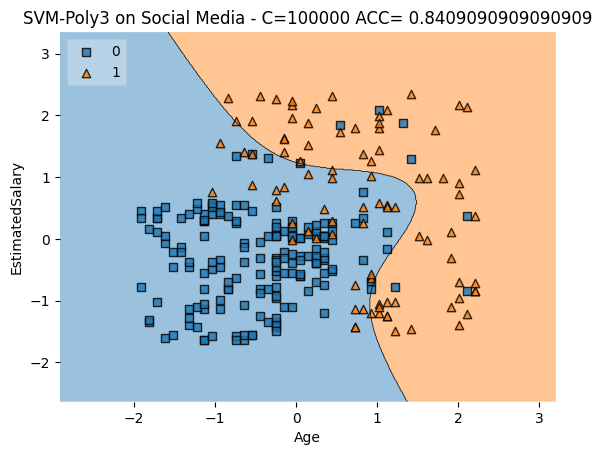

In [22]:


costs = [1,0.9,0.5,0.4,0.3,0.2,0.1,10,100,1000,10000,100000]


for C in costs:
  svm = SVC(C=C,kernel='poly',degree=3) # quanto maior C, menor a tolerância a erro
  svm.fit(X_train, y_train)

  # Plotting decision regions
  plot_decision_regions(X_train, y_train.to_numpy(), clf=svm, legend=2)

  # Adding axes annotations
  plt.xlabel(compras.columns.values[0])
  plt.ylabel(compras.columns.values[1])

  y_pred = svm.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)

  plt.title('SVM-Poly3 on Social Media - ' + 'C='+ str(C) + " ACC= " + str(accuracy))

  plt.show()




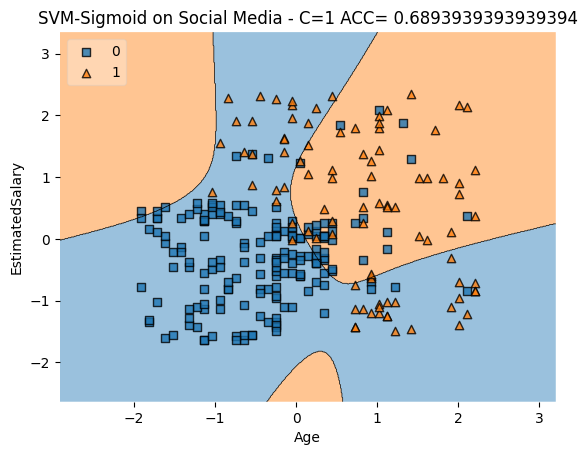

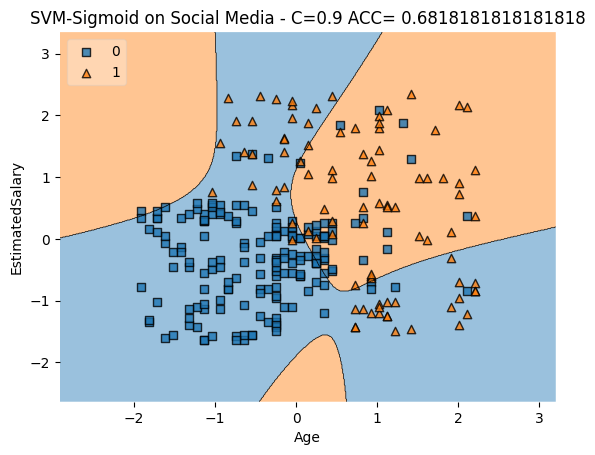

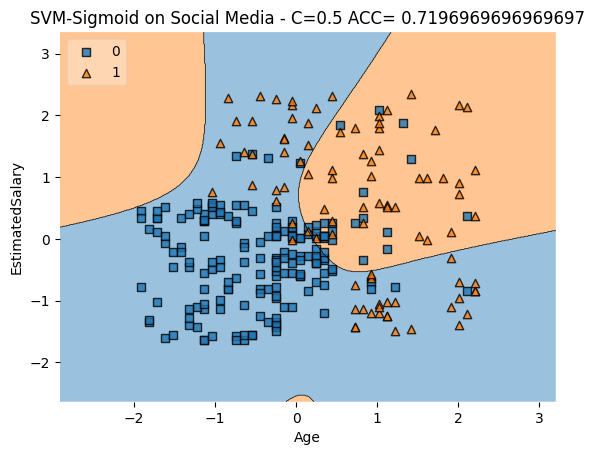

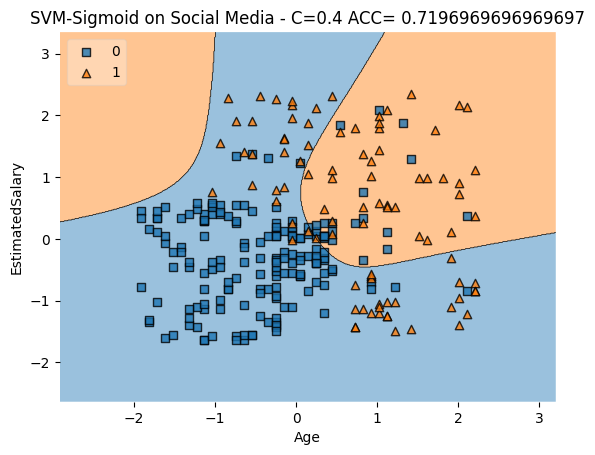

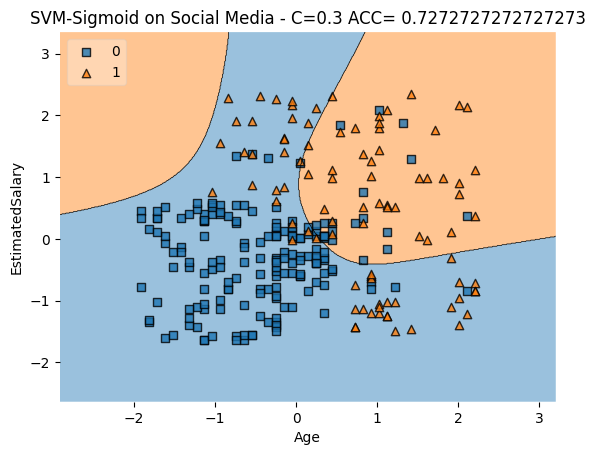

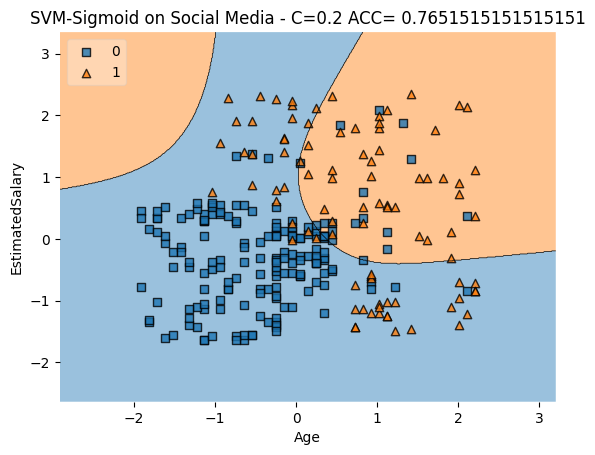

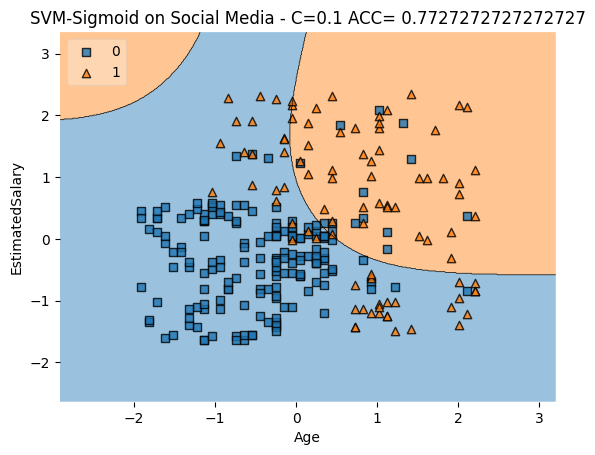

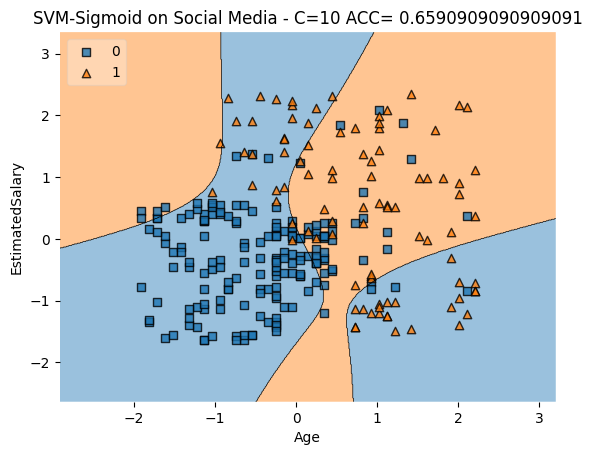

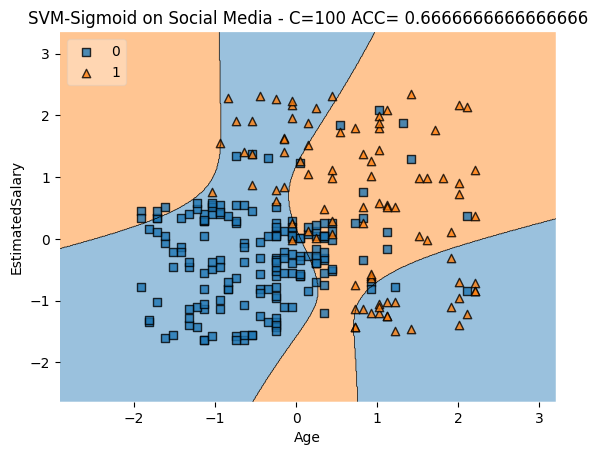

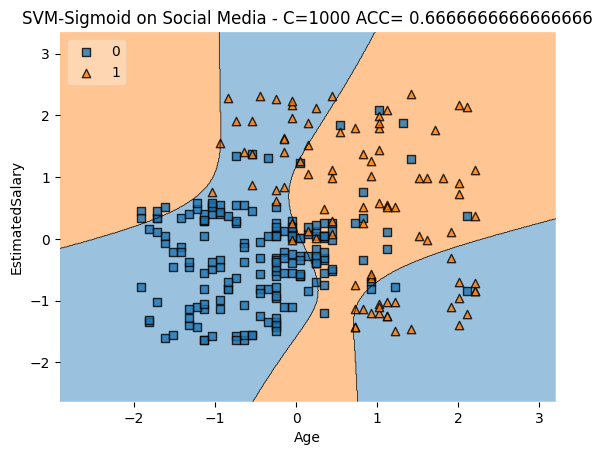

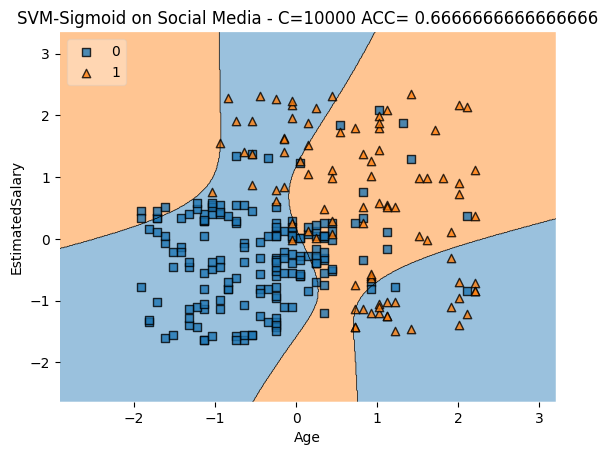

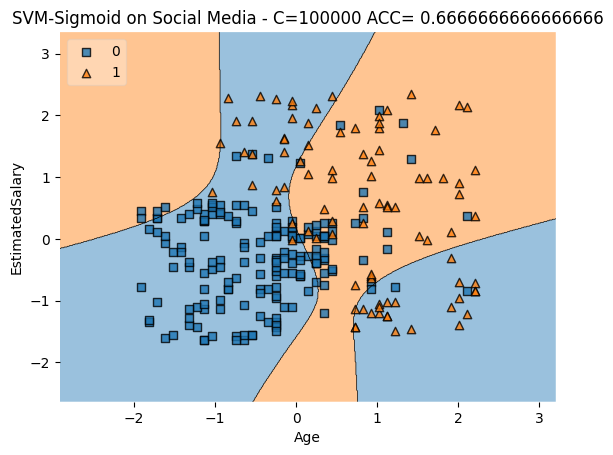

In [23]:


costs = [1,0.9,0.5,0.4,0.3,0.2,0.1,10,100,1000,10000,100000]


for C in costs:
  svm = SVC(C=C,kernel='sigmoid') # quanto maior C, menor a tolerância a erro
  svm.fit(X_train, y_train)

  # Plotting decision regions
  plot_decision_regions(X_train, y_train.to_numpy(), clf=svm, legend=2)

  # Adding axes annotations
  plt.xlabel(compras.columns.values[0])
  plt.ylabel(compras.columns.values[1])

  y_pred = svm.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)

  plt.title('SVM-Sigmoid on Social Media - ' + 'C='+ str(C) + " ACC= " + str(accuracy))

  plt.show()




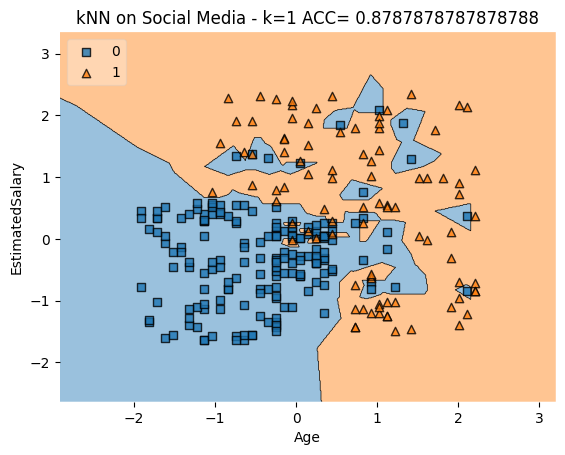

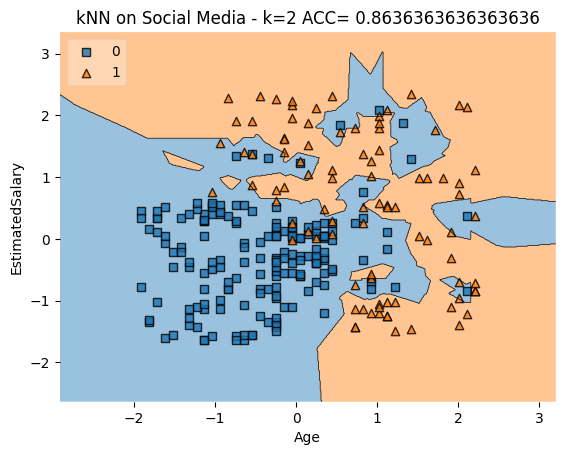

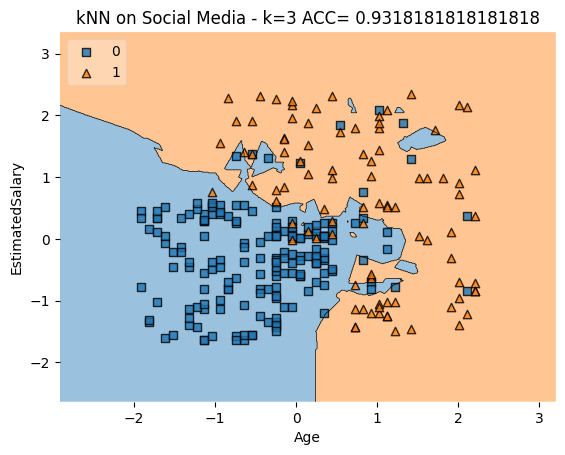

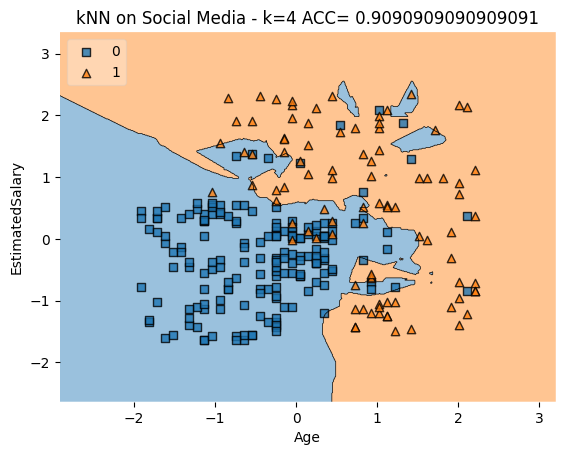

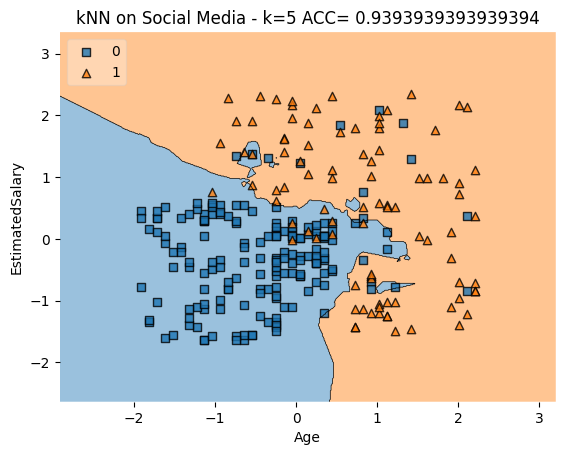

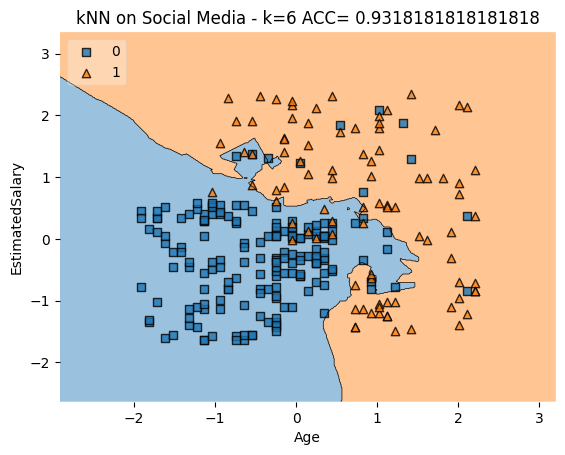

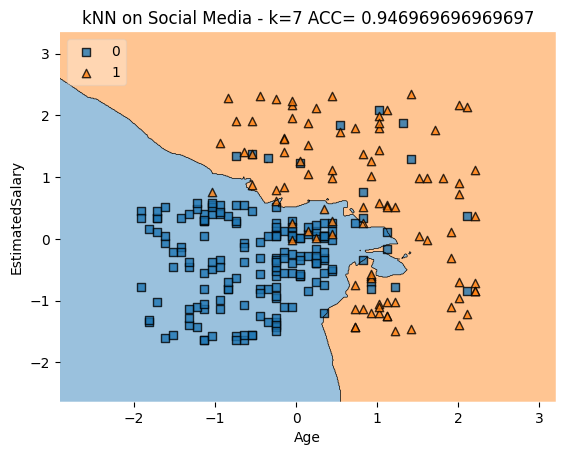

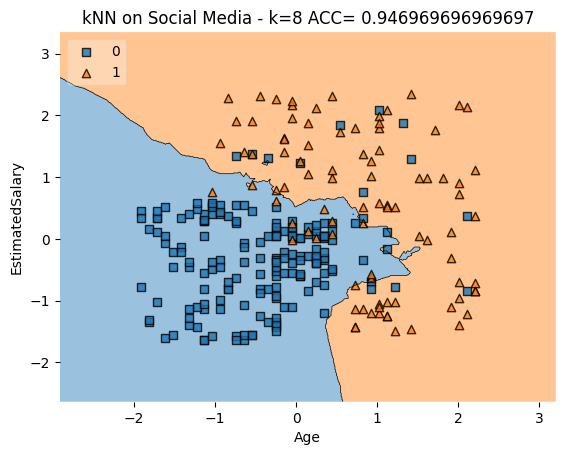

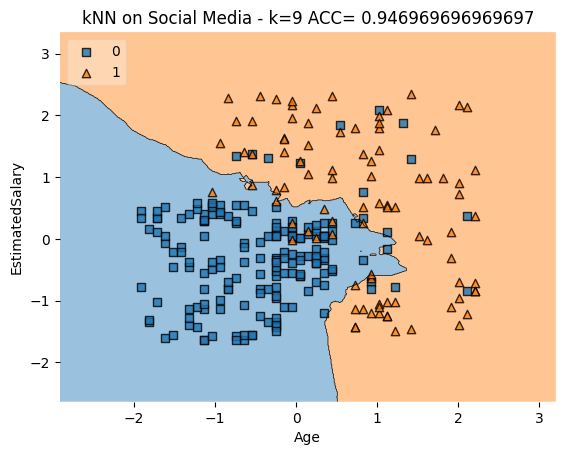

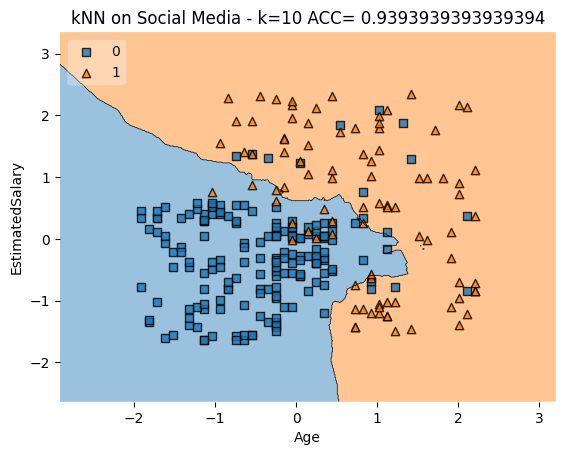

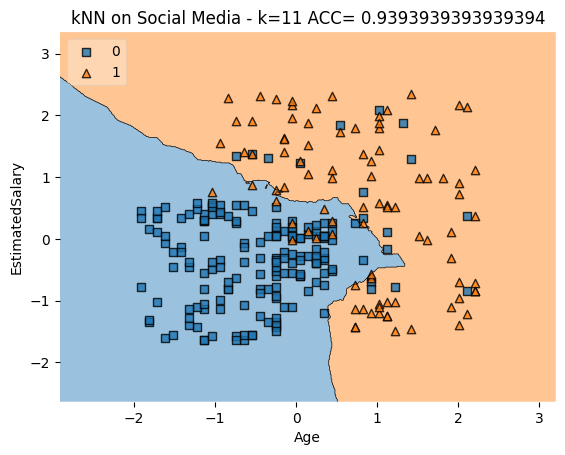

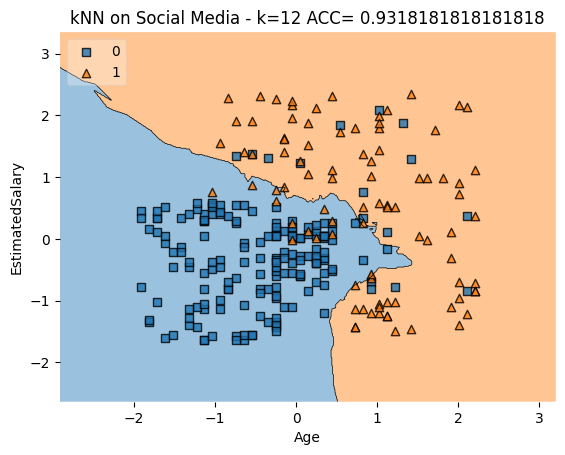

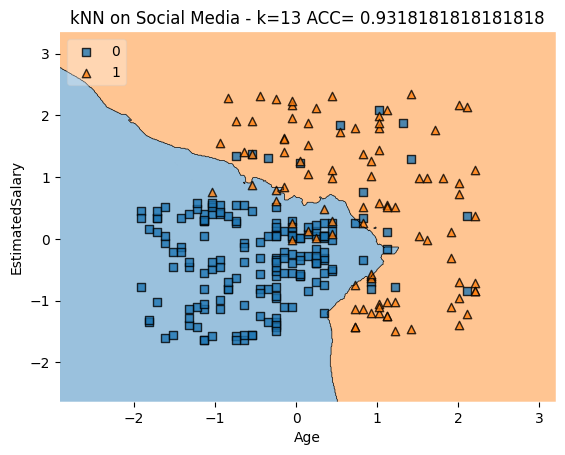

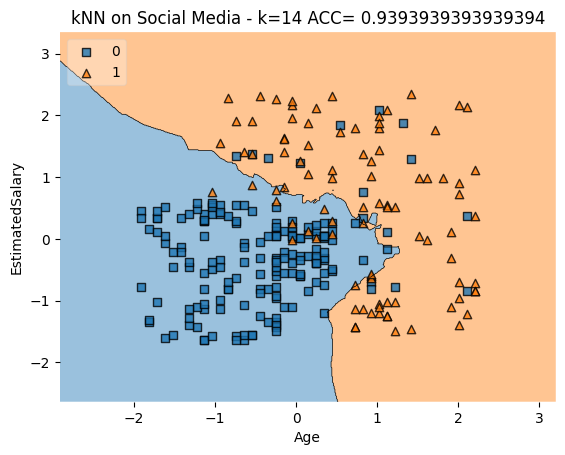

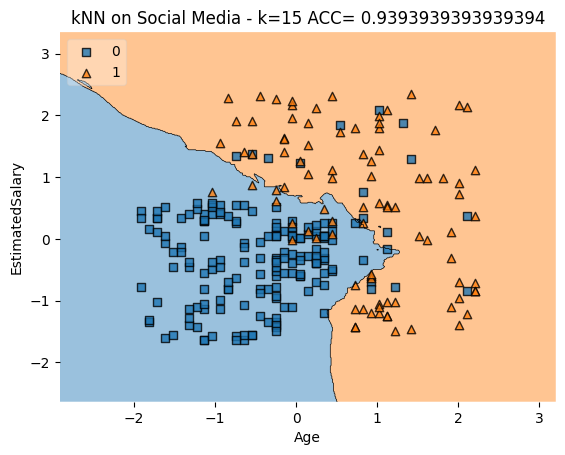

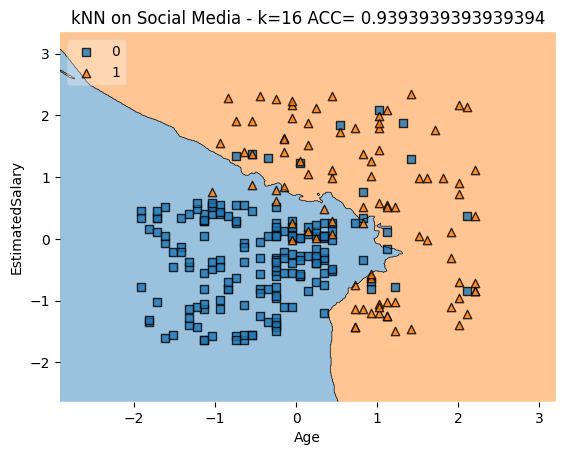

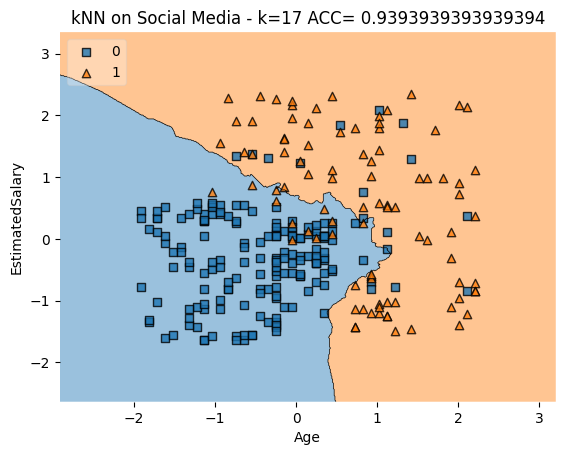

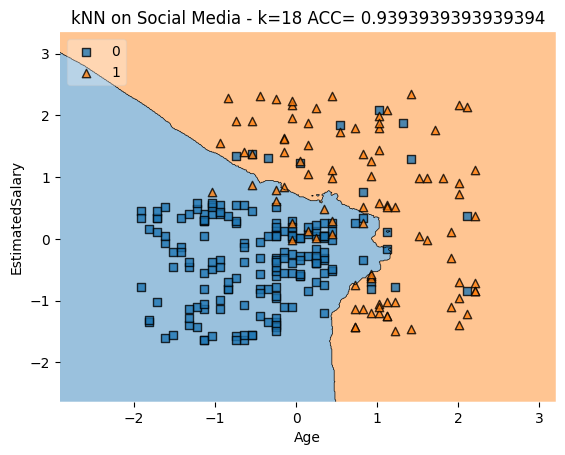

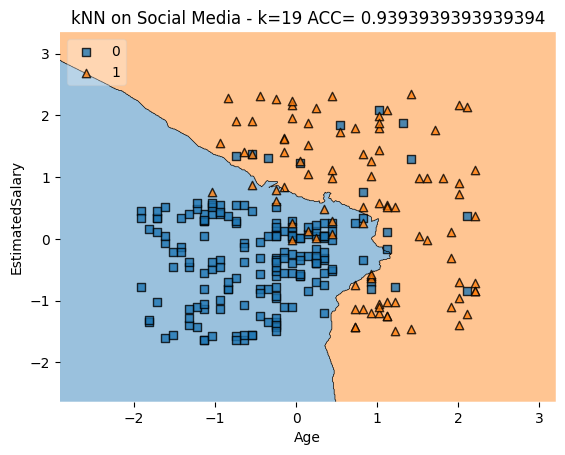

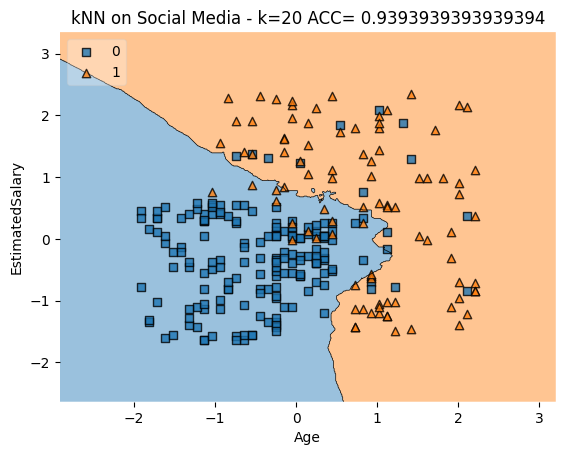

In [24]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1,21):
  neigh = KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train,y_train)

  plot_decision_regions(X_train, y_train.to_numpy(), clf=neigh, legend=2)

  plt.xlabel(compras.columns.values[0])
  plt.ylabel(compras.columns.values[1])

  y_pred = neigh.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)

  plt.title('kNN on Social Media - ' + 'k='+ str(k) + " ACC= " + str(accuracy))

  plt.show()